In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
class FeedforwardNetwork():
    
    def __init__(self, n_layers, nodes_per_layer):
        self.num_inputs = nodes_per_layer[0]
        self.num_output = nodes_per_layer[-1]

        self.outputs = []
        self.deltas = []
        
        self.nodes_per_layer = nodes_per_layer

        self.n_layers = n_layers
        
        self.weights_list = []
        
        for i in range(len(nodes_per_layer) - 1):
            self.weights_list.append(np.zeros((nodes_per_layer[i+1], nodes_per_layer[i] + 1)))
            self.outputs.append(np.zeros(nodes_per_layer[i+1]))
            self.deltas.append(np.zeros((nodes_per_layer[i+1], 1)))        
        
        self.LR = 0.025
        self.MSE = []
        # print(self.weights_list[0])

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
        
    def predict(self, x : np.ndarray):
        curr_input = x

        for i in range(self.n_layers - 1):
            W = self.weights_list[i]
            # print(W, curr_input)
            z = self.sigmoid(np.dot(W, curr_input))
            curr_input = np.insert(z, 0, -1)

        return z

        
    def predict_all(self, x_train, y_train):
        x = self.preprocess(x_train)
        print("PRED   ACT    INPUT")
        for i in range(len(x_train)):
            print(np.round(self.predict(x[i]), decimals=1), " ", y_train[i], " ", x_train[i])
        
    def dE(self, target, out):
        return target - out

    def preprocess(self, x_train):
        neg_ones = -1 * np.ones(x_train.shape[0]).reshape(-1, 1)
        # print(x_train.shape)
        k = np.hstack((neg_ones, x_train))
        return k

        
    def train(self, inputs, all_targets):
        count = 0
        inputs = self.preprocess(inputs)
        num_iter = 30000
        while count < num_iter:
            # print(count)
            count += 1
            for iput in range(len(inputs)):
                curr_input = inputs[iput]
                targets = all_targets[iput]
                for i in range(self.n_layers - 1):
                    W = self.weights_list[i]
                    z = self.sigmoid(np.dot(W, curr_input))
                    self.outputs[i] = z
                    curr_input = np.insert(z, 0, -1)
                
                output = self.outputs[-1]
                self.deltas[-1] = output*(1 - output)*(targets - output)
    
                for i in range(self.n_layers - 2):
                    WT = self.weights_list[-1-i].T
                    print(self.deltas[-1-i])
                    self.deltas[-2 - i] = self.outputs[-i-1]*(1 - self.outputs[-i-1])*(np.dot(WT, self.deltas[-1-i]))
    
                curr_input = inputs[iput]
                for i in range(self.n_layers - 1):
                    self.weights_list[i] += self.LR * np.tile(curr_input, (self.nodes_per_layer[i + 1], 1)) * self.deltas[i]
                    
                    curr_input = np.insert(self.outputs[i], 0, -1)

            self.add_MSE(inputs, all_targets)
            
    def add_MSE(self, x_train, y_train):
        E = 0
        for i in range(x_train.shape[0]):
            E += 0.5 * (y_train[i] - self.predict(x_train[i])) ** 2
        self.MSE.append(E)

    def plotLoss(self):
        plt.plot(np.arange(1, len(self.MSE) + 1), self.MSE)
        plt.show()

    def getWeights(self):
        return self.w

#### MNIST dataset

In [120]:
XOR = FeedforwardNetwork(3, [2, 2, 1])
XOR.train(X_train_XOR, Y_train_XOR)

[-0.125]
[0.12529228]
[0.12499931]
[-0.12529296]
[-0.125]
[0.12529228]
[0.12499932]
[-0.12529296]
[-0.12499999]
[0.12529229]
[0.12499932]
[-0.12529295]
[-0.12499999]
[0.12529229]
[0.12499932]
[-0.12529295]
[-0.12499999]
[0.12529229]
[0.12499933]
[-0.12529295]
[-0.12499998]
[0.1252923]
[0.12499933]
[-0.12529295]
[-0.12499998]
[0.1252923]
[0.12499933]
[-0.12529294]
[-0.12499998]
[0.1252923]
[0.12499934]
[-0.12529294]
[-0.12499998]
[0.12529231]
[0.12499934]
[-0.12529294]
[-0.12499997]
[0.12529231]
[0.12499934]
[-0.12529293]
[-0.12499997]
[0.12529231]
[0.12499935]
[-0.12529293]
[-0.12499997]
[0.12529232]
[0.12499935]
[-0.12529293]
[-0.12499996]
[0.12529232]
[0.12499935]
[-0.12529293]
[-0.12499996]
[0.12529232]
[0.12499935]
[-0.12529292]
[-0.12499996]
[0.12529233]
[0.12499936]
[-0.12529292]
[-0.12499996]
[0.12529233]
[0.12499936]
[-0.12529292]
[-0.12499995]
[0.12529233]
[0.12499936]
[-0.12529292]
[-0.12499995]
[0.12529234]
[0.12499937]
[-0.12529291]
[-0.12499995]
[0.12529234]
[0.12499937]
[

PRED   ACT    INPUT
[0.5]   0   [0 0]
[0.5]   1   [0 1]
[0.5]   1   [1 0]
[0.5]   0   [1 1]


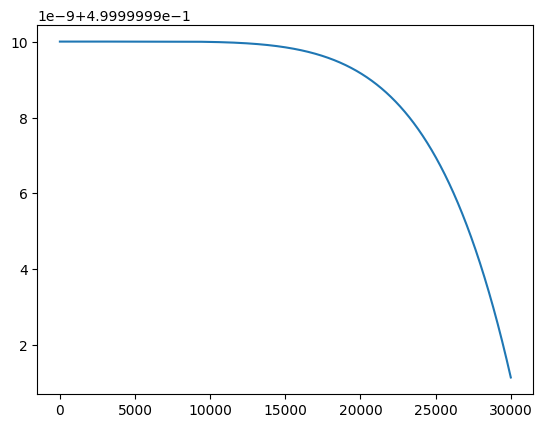

In [121]:
XOR.predict_all(X_train_XOR, Y_train_XOR)
XOR.plotLoss()

In [122]:
X_train_Pal_4 = np.array([[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 1], 
                          [0, 1, 0, 0], [0, 1, 0, 1], [0, 1, 1, 0], [0, 1, 1, 1], 
                          [1, 0, 0, 0], [1, 0, 0, 1], [1, 0, 1, 0], [1, 0, 1, 1], 
                          [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [1, 1, 1, 1]])

Y_train_Pal_4 = np.array([1, 0, 0, 0, 
                          0, 0, 1, 0, 
                          0, 1, 0, 0, 
                          0, 0, 0, 1])

In [123]:
PAL4 = FeedforwardNetwork(4, [4,2,2,1])
PAL4.train(X_train_Pal_4, Y_train_Pal_4)
PAL4.predict_all(X_train_Pal_4, Y_train_Pal_4)

[0.125]
[0. 0. 0.]


ValueError: shapes (3,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)

In [88]:
# Function to one-hot encode the target variable into the 10 classes (0-9)
# Input shape: (N,),    Output: (N, 10)
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, 10))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y

In [48]:
# Loading the MNIST dataset
train_data=pd.read_csv(r"./mnist_train.csv")
test_data=pd.read_csv(r"./mnist_test.csv")

# Preprocessing the data
train_data=train_data.to_numpy()    # train_data shape: (60000, 785)
test_data=test_data.to_numpy()      # test_data shape: (10000, 785)

X_train=train_data[:,1:]            # X_train shape: (60000, 784)
y_train=train_data[:,0]             # y_train shape: (60000,)
X_test=test_data[:,1:]              # X_test shape: (10000, 784)
y_test=test_data[:,0]               # y_test shape: (10000,)

X_train = X_train / 255.0           # Normalizing the data
X_test = X_test / 255.0

one_hot_y_train = one_hot(y_train)  # one_hot_y_train shape: (60000, 10)
one_hot_y_test = one_hot(y_test)    # one_hot_y_test shape: (10000, 10)

FileNotFoundError: [Errno 2] No such file or directory: './mnist_train.csv'

#### Training on the other Boolean functions

In [ ]:
X_train_XOR = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_train_XOR = np.array([0, 1, 1, 0])